<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ml_zero_to_hero/ml_zero_to_hero_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 写経元

[Build an image classifier (ML Zero to Hero - Part 4)](https://www.youtube.com/watch?v=u2TjZzNuly8&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=16&t=0s)

TensorFlow を用いたじゃんけんの画像認識。


[Course 2 - Part 8 - Lesson 2 - Notebook (RockPaperScissors)](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb)

[じゃんけん画像データ](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors)


## 画像データのダウンロード

In [9]:
!wget --no-check-certificate  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -O /tmp/rps.zip
!wget --no-check-certificate  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -O /tmp/rps-test-set.zip

--2020-05-26 10:03:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   156MB/s    in 1.2s    

2020-05-26 10:03:46 (156 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-05-26 10:03:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

## zipファイルの展開

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [11]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('tortal training rock images:', len(os.listdir(rock_dir)))
print('tortal training paperk images:', len(os.listdir(paper_dir)))
print('tortal training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])



tortal training rock images: 840
tortal training paperk images: 840
tortal training scissors images: 840
['rock01-108.png', 'rock03-016.png', 'rock01-089.png', 'rock01-064.png', 'rock06ck02-019.png', 'rock05ck01-009.png', 'rock02-092.png', 'rock05ck01-095.png', 'rock01-098.png', 'rock07-k03-059.png']
['paper01-024.png', 'paper07-030.png', 'paper04-061.png', 'paper07-095.png', 'paper05-061.png', 'paper05-099.png', 'paper06-053.png', 'paper07-101.png', 'paper01-072.png', 'paper04-093.png']
['testscissors01-073.png', 'scissors03-052.png', 'scissors03-012.png', 'scissors04-116.png', 'testscissors03-015.png', 'scissors01-085.png', 'scissors02-034.png', 'scissors01-082.png', 'scissors02-025.png', 'scissors03-054.png']


In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

VALIDATION_DIR = "/tmp/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data=validation_generator, verbose=1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

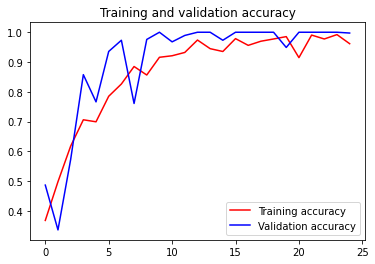

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [21]:
!ls -l
!pwd

from google.colab import files
model.save_weights("rps.hdf5")

files.download("/content/rps.hdf5")
files.download('rps.h5')

total 40796
-rw-r--r-- 1 root root 27846968 May 26 11:23 rps.h5
-rw-r--r-- 1 root root 13922184 May 26 11:37 rps.hdf5
drwxr-xr-x 1 root root     4096 May 13 16:29 sample_data
/content


In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)